In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
df_skill_count = df.copy()

In [3]:
df_explode = df_skill_count.explode('job_skills')

In [4]:
df_grouped = df_explode.groupby(['job_skills','job_title_short']).size()

In [5]:
df_grouped.sort_values(ascending=False,inplace=True)

In [6]:
df_skill = df_grouped.reset_index(name='skill count')

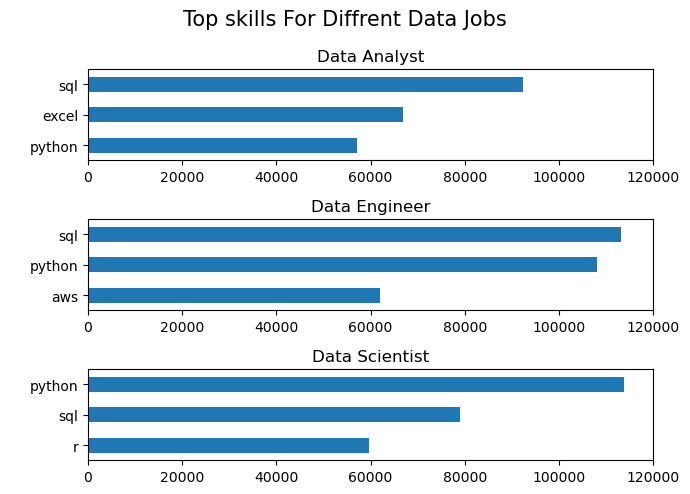

In [11]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
fig, ax = plt.subplots(3,1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skill[df_skill['job_title_short'] == job_title].head(3)
    df_plot.plot(kind='barh' , x='job_skills',y='skill count',ax=ax[i],title=job_title,legend=False,figsize=(7,5))
    ax[i].set_ylabel(' ')
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,120000)
    fig.suptitle('Top skills For Diffrent Data Jobs',fontsize=15)
    fig.tight_layout()

